Load and Merge Data

In [130]:
import pandas as pd

#Load datasets
train_df = pd.read_csv('train.csv')
stores_df = pd.read_csv('stores.csv')
features_df = pd.read_csv('features.csv')

In [131]:
def ensure_datetime(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

ensure_datetime(train_df, 'Date')
ensure_datetime(features_df, 'Date')
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [132]:
df = train_df.merge(features_df, on = ['Store', 'Date', 'IsHoliday'], how='left')
df = df.merge(stores_df, on = ['Store'], how = 'left')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [135]:
# df1 = df.copy()
# df1.set_index('Date', inplace=True)
# dataset = df1.values
dataset.shape


(421570, 15)

In [41]:
# df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [42]:
df.sort_values(by=['Store','Dept','Date'], inplace=True)
# df.set_index('Date', inplace = True)
# df = df.reset_index() 
df = df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
df.head()

# df.isna().sum()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [44]:
# Identify numerical and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
def groupwise_interpolation(group):
    # Set 'Date' as index
    group = group.set_index('Date')
    
    # # Apply time interpolation for numeric columns
    group[numeric_cols] = group[numeric_cols].interpolate(method='time',limit_direction='both')
    # group[numeric_cols] = group[numeric_cols].ffill().bfill()
    # Apply forward fill and backward fill for categorical columns
    group[categorical_cols] = group[categorical_cols].ffill().bfill()
    
    # Reset index back to the default
    return group.reset_index()

# Step 2: Apply the function to each group
df = df.groupby(['Store', 'Dept'], group_keys = False).apply(groupwise_interpolation)

# Check if there are any missing values left
print(df.isna().sum())

# Display the first few rows of the DataFrame to verify changes
print(df.head())


Date            0
Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64
        Date  Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0 2010-02-05      1     1      24924.50      False        42.31       2.572   
1 2010-02-12      1     1      46039.49       True        38.51       2.548   
2 2010-02-19      1     1      41595.55      False        39.93       2.514   
3 2010-02-26      1     1      19403.54      False        46.63       2.561   
4 2010-03-05      1     1      21827.90      False        46.50       2.625   

          CPI  Unemployment Type    Size  
0  211.096358         8.106    A  151315  
1  211.242170         8.106    A  151315  
2  211.289143         8.106    A  151315  
3  211.319643         8.106    A  151315  
4  211.350143         8.106    A  151315  


/tmp/ipykernel_2307834/2283870204.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Store', 'Dept'], group_keys = False).apply(groupwise_interpolation)


In [45]:
df['Year']= df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['DayOfWeek']=df['Date'].dt.dayofweek
df['WeekOfYear']=df['Date'].dt.isocalendar().week
df['IsMonthStart']=df['Date'].dt.is_month_start
df['IsMonthEnd']=df['Date'].dt.is_month_end
df['Quarter']=df['Date'].dt.quarter
df

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day,DayOfWeek,WeekOfYear,IsMonthStart,IsMonthEnd,Quarter
0,2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,4,5,False,False,1
1,2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,12,4,6,False,False,1
2,2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,19,4,7,False,False,1
3,2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,26,4,8,False,False,1
4,2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,5,4,9,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2012-09-28,45,98,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,9,28,4,39,False,False,3
131,2012-10-05,45,98,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,10,5,4,40,False,False,4
132,2012-10-12,45,98,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,10,12,4,41,False,False,4
133,2012-10-19,45,98,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,10,19,4,42,False,False,4


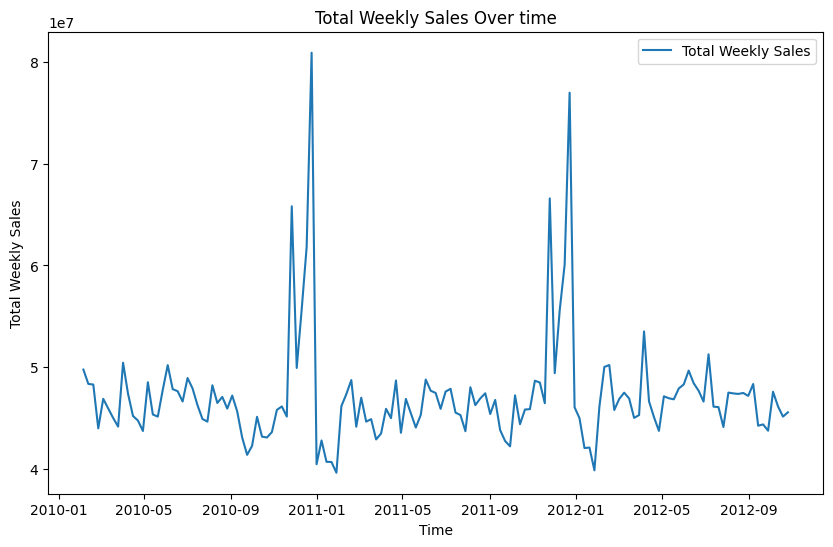

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df.groupby('Date')['Weekly_Sales'].sum(),label='Total Weekly Sales')
plt.title('Total Weekly Sales Over time')
plt.xlabel('Time')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.show()



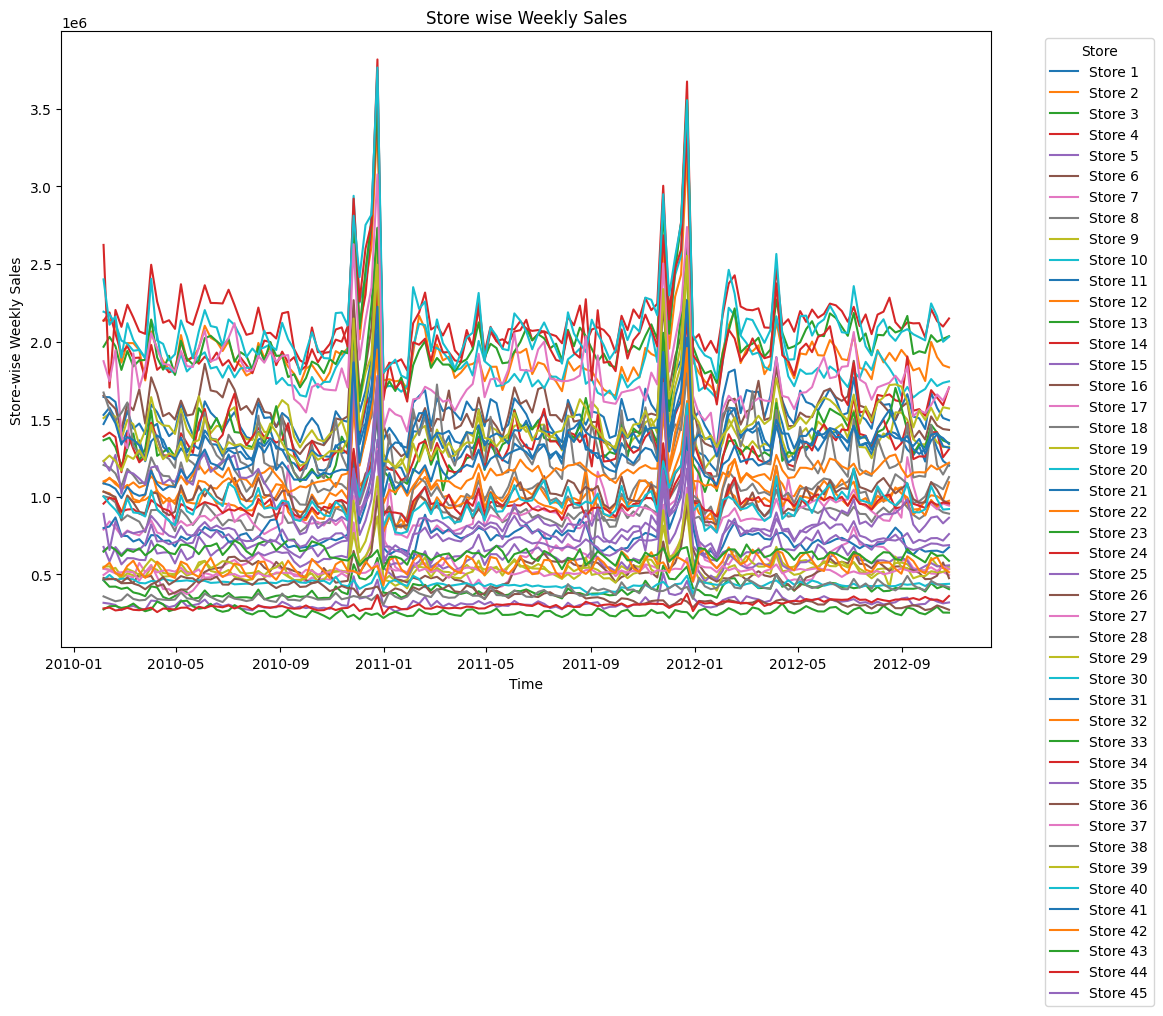

In [47]:
plt.figure(figsize=(12,8))

for store_id in df['Store'].unique():
    store_df = df[df['Store']== store_id]
    store_sales = store_df.groupby('Date')['Weekly_Sales'].sum()
    plt.plot(store_sales.index,store_sales.values, label = f'Store {store_id}')

plt.title('Store wise Weekly Sales')
plt.xlabel('Time')
plt.ylabel('Store-wise Weekly Sales')
plt.legend(title ='Store', bbox_to_anchor=(1.05,1), loc= 'upper left')
plt.show()


In [48]:
aggregated_df = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
aggregated_df['Date']=pd.to_datetime(aggregated_df['Date'])
aggregated_df.set_index('Date', inplace=True)
aggregated_df.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


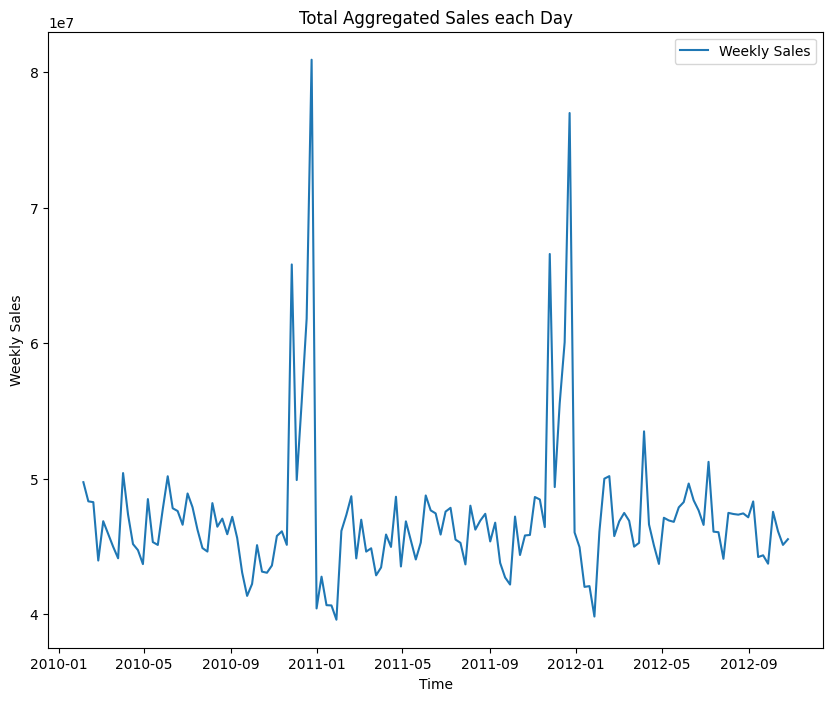

In [49]:
plt.figure(figsize=(10,8))
plt.plot(aggregated_df['Weekly_Sales'],label='Weekly Sales')
plt.title('Total Aggregated Sales each Day')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

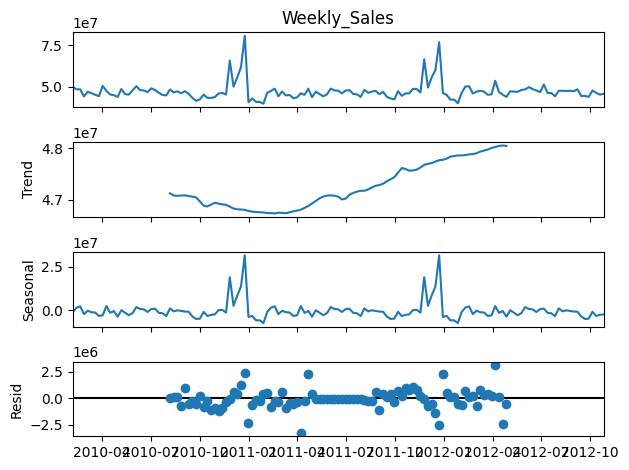

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(aggregated_df['Weekly_Sales'], model ='additive')

decomposition.plot()
plt.show()

In [51]:

Q1 = aggregated_df['Weekly_Sales'].quantile(0.25)
Q3 = aggregated_df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

iqr_outlier_dates = aggregated_df[(aggregated_df['Weekly_Sales'] < lower_bound) | (aggregated_df['Weekly_Sales'] > upper_bound)].index
print(f"Detected {len(iqr_outlier_dates)} IQR-based outlier dates.")

Detected 12 IQR-based outlier dates.


In [52]:
residuals = decomposition.resid.dropna()
# residuals['Date'] = pd.to_datetime(residuals['Date'])
# residuals.set_index('Date', inplace=True)
# print(residuals)
# trend = decomposition.trend
# seasonal = decomposition.seasonal

Q1_res = residuals.quantile(0.25)
Q3_res = residuals.quantile(0.75)

IQR_res = Q3_res - Q1_res

lower_bound_res = Q1_res - 1.5*IQR_res
upper_bound_res = Q3_res + 1.5*IQR_res

iqr_outlier_dates_res =residuals[(residuals< lower_bound_res) | (residuals> upper_bound_res)].index

print(f"Detected {len(iqr_outlier_dates_res)} IQR-based outlier dates using residuals.")

Detected 8 IQR-based outlier dates using residuals.


In [53]:
all_outlier_dates = pd.Index(iqr_outlier_dates).union(iqr_outlier_dates_res)
df_no_outliers = df[~df['Date'].isin(all_outlier_dates)]
print(f"Original Data Size: {len(df)}, After Removing Outliers: {len(df_no_outliers)}")

Original Data Size: 421570, After Removing Outliers: 374033


<Figure size 1000x800 with 0 Axes>

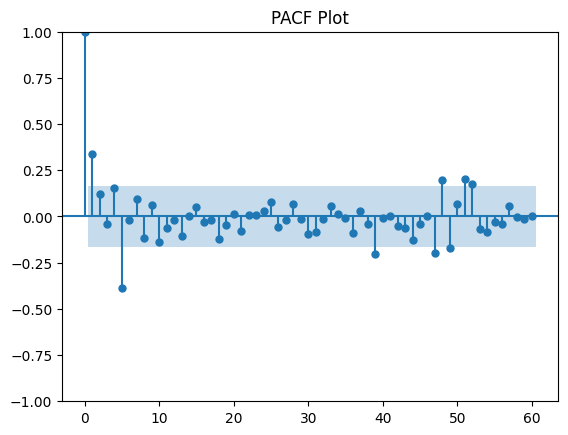

<Figure size 1000x800 with 0 Axes>

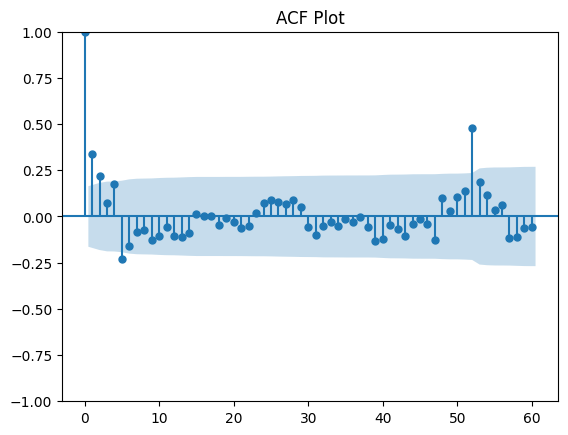

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plt.figure(figsize=(10,8))
plot_pacf(aggregated_df['Weekly_Sales'], lags = 60)
plt.title('PACF Plot')
plt.show()

plt.figure(figsize=(10,8))
plot_acf(aggregated_df['Weekly_Sales'], lags = 60)
plt.title('ACF Plot')
plt.show()

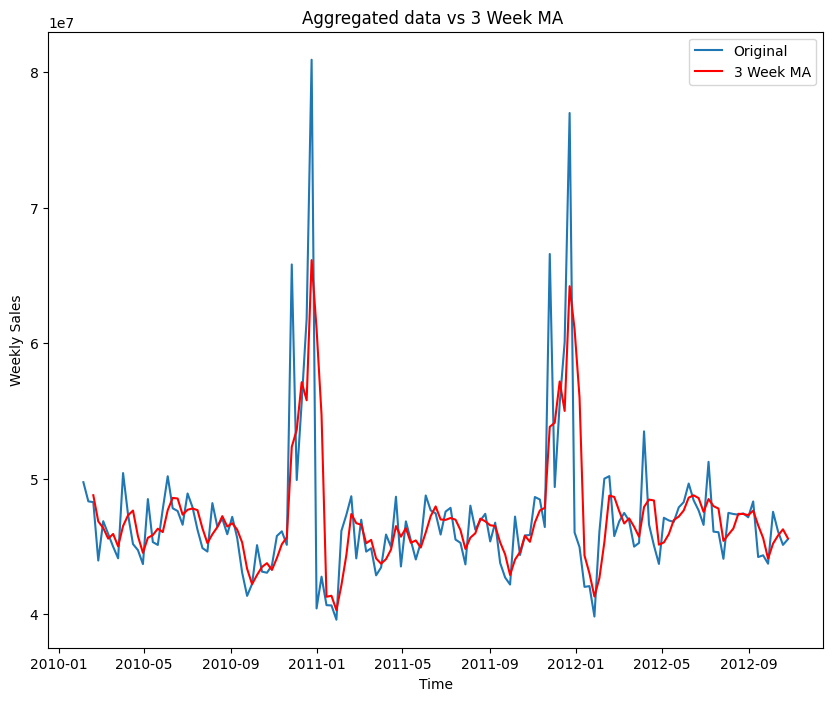

In [55]:
aggregated_df['3_Week_MA'] = aggregated_df['Weekly_Sales'].rolling(window=3).mean()
aggregated_df['14_Week_MA'] = aggregated_df['Weekly_Sales'].rolling(window=14).mean()

plt.figure(figsize=(10,8))
plt.plot(aggregated_df['Weekly_Sales'], label='Original')
plt.plot(aggregated_df['3_Week_MA'], color='red', label='3 Week MA')
plt.title('Aggregated data vs 3 Week MA ')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

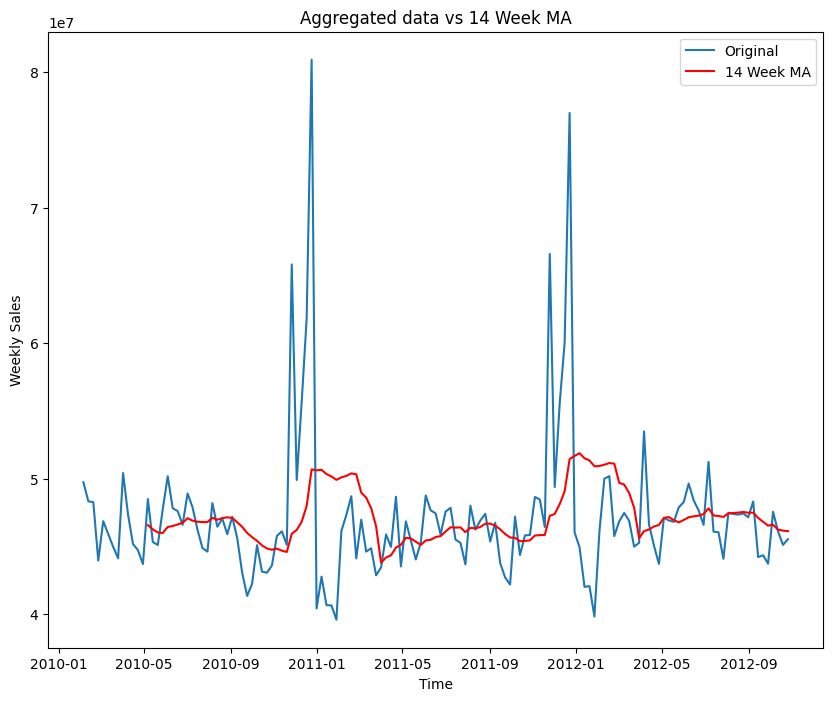

In [56]:
plt.figure(figsize=(10,8))
plt.plot(aggregated_df['Weekly_Sales'], label = 'Original')
plt.plot(aggregated_df['14_Week_MA'], color='red', label ='14 Week MA')
plt.title('Aggregated data vs 14 Week MA')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [70]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(aggregated_df['Weekly_Sales'])

adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64

In [71]:
aggregated_df_diff = aggregated_df['Weekly_Sales'].diff().dropna()


adf_test_diff = adfuller(aggregated_df_diff)

adf_output_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in adf_test_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

adf_output_diff


Test Statistic                -6.699469e+00
p-value                        3.922579e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64

In [72]:
aggregated_df_diff = aggregated_df['Weekly_Sales'].diff(52).dropna()


adf_test_diff = adfuller(aggregated_df_diff)

adf_output_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in adf_test_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

adf_output_diff

Test Statistic                -7.389027e+00
p-value                        8.092497e-11
#Lags Used                     0.000000e+00
Number of Observations Used    9.000000e+01
Critical Value (1%)           -3.505190e+00
Critical Value (5%)           -2.894232e+00
Critical Value (10%)          -2.584210e+00
dtype: float64

In [74]:
from statsmodels.tsa.arima.model import ARIMA

split_date = '2012-05-01'
train = aggregated_df[aggregated_df.index < split_date]['Weekly_Sales']
test = aggregated_df[aggregated_df.index >= split_date]['Weekly_Sales']

p = 1
q = 3
d = 0

model = ARIMA(train, order=(p,d,q))
model_fir = model.fit()

print(model_fir.summary())



                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  117
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -1977.617
Date:                Sun, 01 Sep 2024   AIC                           3967.234
Time:                        15:43:11   BIC                           3983.807
Sample:                    02-05-2010   HQIC                          3973.963
                         - 04-27-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.717e+07   1.41e-07   3.35e+14      0.000    4.72e+07    4.72e+07
ar.L1         -0.6126      0.333     -1.841      0.066      -1.265       0.040
ma.L1          1.0770      0.314      3.428      0.0

/home/cip/medtech2024/ry19qure/Documents/Time_series_practice/TimeSeries/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/home/cip/medtech2024/ry19qure/Documents/Time_series_practice/TimeSeries/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/home/cip/medtech2024/ry19qure/Documents/Time_series_practice/TimeSeries/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


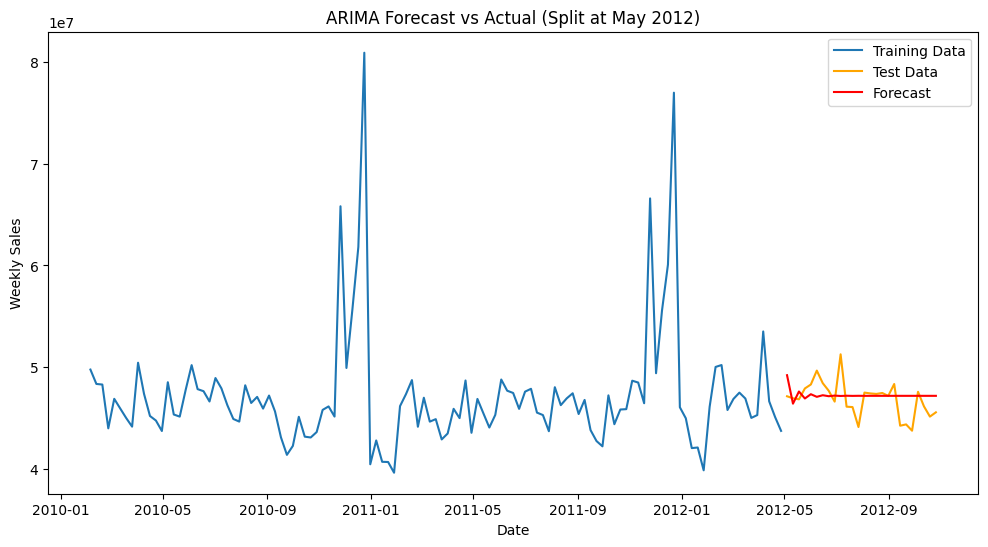

In [75]:
forecast = model_fir.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('ARIMA Forecast vs Actual (Split at May 2012)')
plt.legend()
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1780187.8957908826


In [88]:
import warnings
warnings.filterwarnings('ignore')

seasonal_period = 52
aggregated_s = aggregated_df.diff(seasonal_period).dropna().reset_index()
print(int(len(aggregated_s)*0.5))
print(int(len(aggregated_df)*0.5))


39
71


In [90]:
aggregated_s['Date'] = pd.to_datetime(aggregated_s['Date'])
aggregated_s = aggregated_s.set_index('Date')


In [91]:
aggregated_s 

,Weekly_Sales,3_Week_MA,14_Week_MA
Date,,,
2011-05-06,-1641285.23,7.086201e+05,-935153.692143
2011-05-13,116064.62,-5.667715e+05,-669889.835000
2011-05-20,-1073510.05,-8.662436e+05,-675105.921429
2011-05-27,-2464045.52,-1.140497e+06,-882478.482857
2011-06-03,-1416548.94,-1.651368e+06,-994895.457857
...,...,...,...
2012-09-28,1539068.59,1.202533e+06,874600.366429
2012-10-05,354950.95,1.176823e+06,970054.532857
2012-10-12,1753693.95,1.215904e+06,852907.093571


<Figure size 1000x800 with 0 Axes>

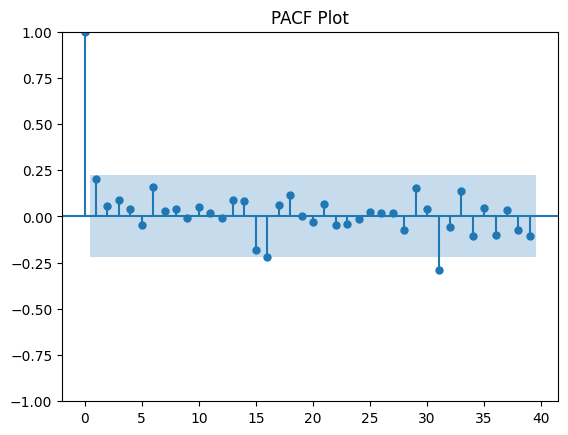

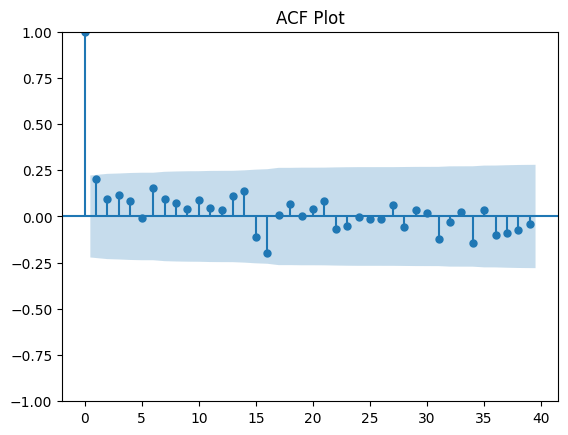

In [92]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plt.figure(figsize=(10,8))
plot_pacf(aggregated_s['Weekly_Sales'], lags = 39, title='PACF Plot')
plot_acf(aggregated_s['Weekly_Sales'], lags = 39, title='ACF Plot')
plt.show()

In [93]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(aggregated_s['Weekly_Sales'])

adf_output = pd.Series(adf_test[0:4], index = ['Test_Statistic', 'p_value', '#Lags Used','Number of Observations Used'])

for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test_Statistic                -7.129405e+00
p_value                        3.549943e-10
#Lags Used                     0.000000e+00
Number of Observations Used    7.700000e+01
Critical Value (1%)           -3.518281e+00
Critical Value (5%)           -2.899878e+00
Critical Value (10%)          -2.587223e+00
dtype: float64

In [101]:
aggregated_df_n = aggregated_df[~aggregated_df.index.isin(all_outlier_dates)]

In [104]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

split_date ='2012-05-01'

train = aggregated_df[aggregated_df.index < split_date]['Weekly_Sales']
test = aggregated_df[aggregated_df.index >= split_date]['Weekly_Sales']

p = 1
d = 0
q = 3

P = 1
D = 0
Q = 1
S = 52

sarima_model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,S))
model_fit = sarima_model.fit()

print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70494D+01    |proj g|=  4.08565D-01


 This problem is unconstrained.



At iterate    5    f=  1.69128D+01    |proj g|=  3.66538D-02

At iterate   10    f=  1.69068D+01    |proj g|=  6.25503D-04

At iterate   15    f=  1.69067D+01    |proj g|=  4.65629D-03

At iterate   20    f=  1.69044D+01    |proj g|=  2.29478D-02

At iterate   25    f=  1.69010D+01    |proj g|=  5.09191D-03

At iterate   30    f=  1.69001D+01    |proj g|=  2.17337D-03

At iterate   35    f=  1.69001D+01    |proj g|=  3.42379D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     44      1     0     0   5.913D-05   1.690D+01
  F =   16.900064979952390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

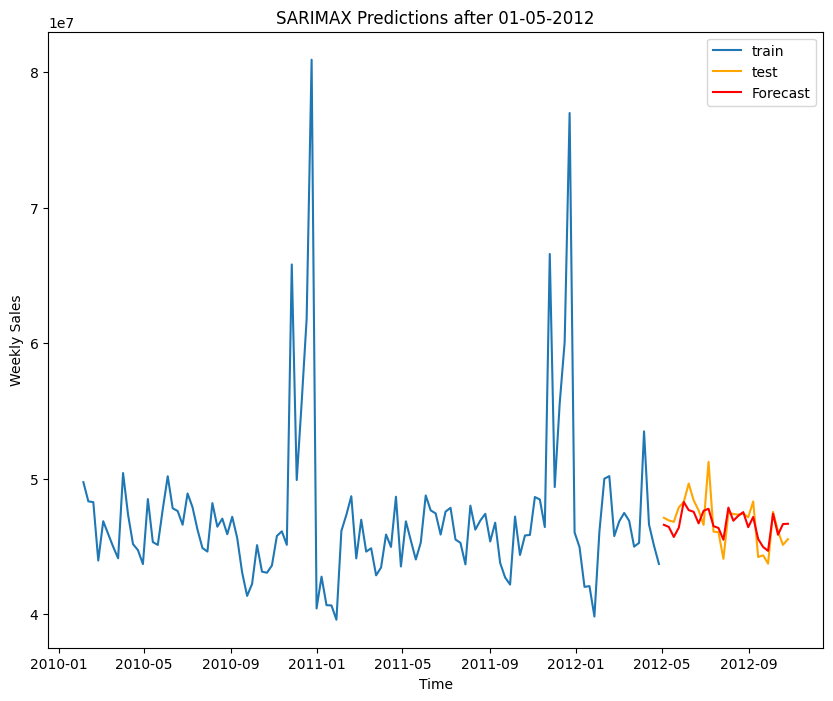

In [105]:
seasonal_forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(10,8))
plt.plot(train , label = 'train')
plt.plot(test , color ='orange', label ='test')
plt.plot(test.index, seasonal_forecast, color = 'red', label='Forecast')
plt.title('SARIMAX Predictions after 01-05-2012')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, seasonal_forecast)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1141363.2283602008


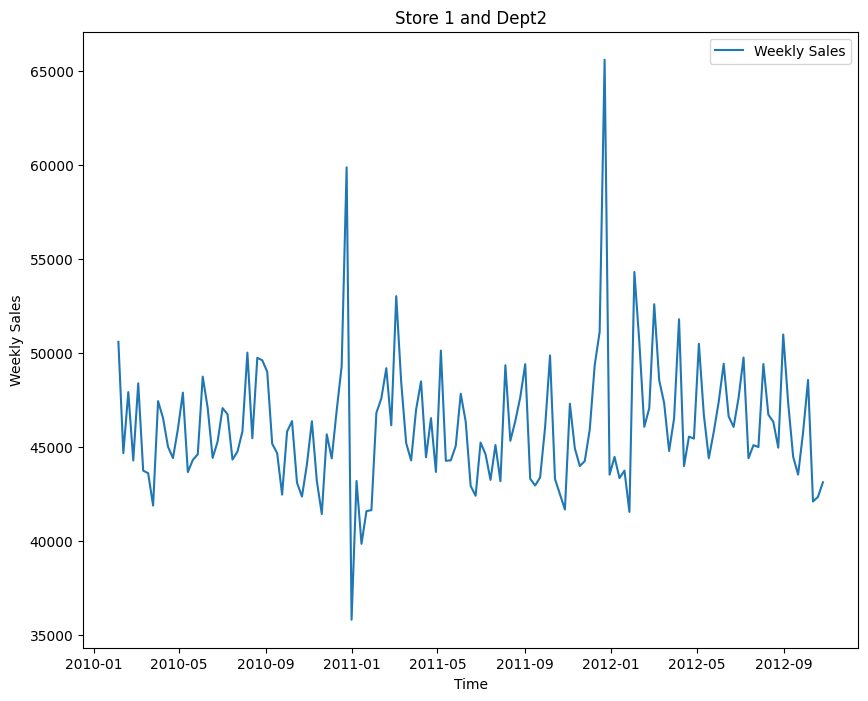

In [107]:
store_id = 1
dept_id = 2

store_df = df[(df['Store'] == store_id) & (df['Dept'] == dept_id)]

plt.figure(figsize= (10,8))
plt.plot(store_df['Date'], store_df['Weekly_Sales'], label ='Weekly Sales')
plt.title(f'Store {store_id} and Dept{dept_id}')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

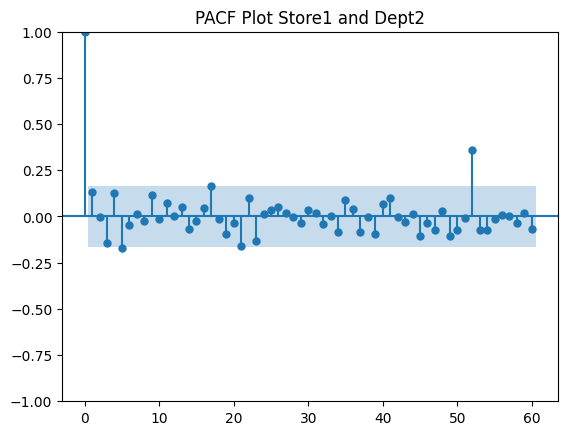

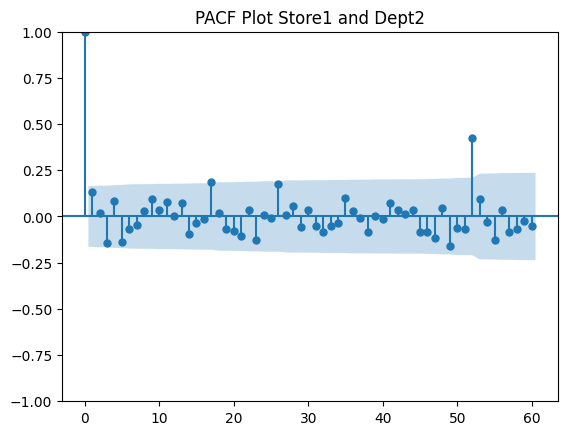

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10,8))
plot_pacf(store_df['Weekly_Sales'], lags = 60, title=f'PACF Plot Store{store_id} and Dept{dept_id}')
plot_acf(store_df['Weekly_Sales'], lags = 60, title=f'PACF Plot Store{store_id} and Dept{dept_id}')
plt.show()

In [109]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(store_df['Weekly_Sales'])

adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                -5.814019e+00
p-value                        4.334646e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64

In [113]:
store_df['Seaosnal_diff'] = store_df['Weekly_Sales'].diff(seasonal_period).fillna(0)
# store_df_diff['Date'] = pd.to_datetime(store_df_diff['Date'])
# store_df_diff = store_df_diff.set_index('Date', inplace=True)
store_df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,...,IsMonthEnd,Quarter,is_Weekend,IsMonthEnd_boolean,Weekly_lag,Bi_Weekly_lag,Monthly_lag,Yearly_lag,Tri_Weekly_lag,Seaosnal_diff
0,2010-02-05,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,...,False,1,False,0,50605.27,50605.27,50605.27,50605.27,21904.47,0.0
1,2010-02-12,1,2,44682.74,True,38.51,2.548,211.242170,8.106,A,...,False,1,False,0,50605.27,50605.27,50605.27,50605.27,21904.47,0.0
2,2010-02-19,1,2,47928.89,False,39.93,2.514,211.289143,8.106,A,...,False,1,False,0,44682.74,50605.27,50605.27,50605.27,21904.47,0.0
3,2010-02-26,1,2,44292.87,False,46.63,2.561,211.319643,8.106,A,...,False,1,False,0,47928.89,44682.74,50605.27,50605.27,50605.27,0.0
4,2010-03-05,1,2,48397.98,False,46.50,2.625,211.350143,8.106,A,...,False,1,False,0,44292.87,47928.89,50605.27,50605.27,44682.74,0.0


<Figure size 1000x800 with 0 Axes>

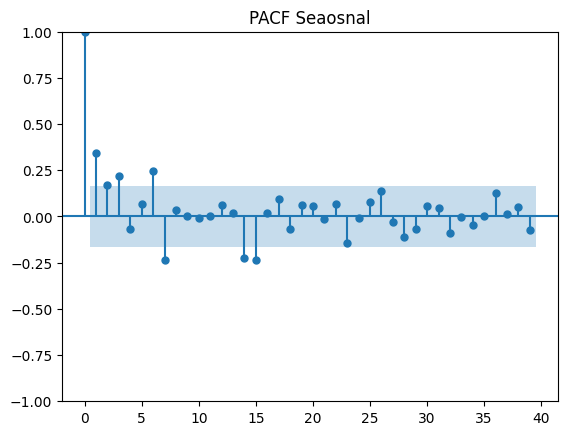

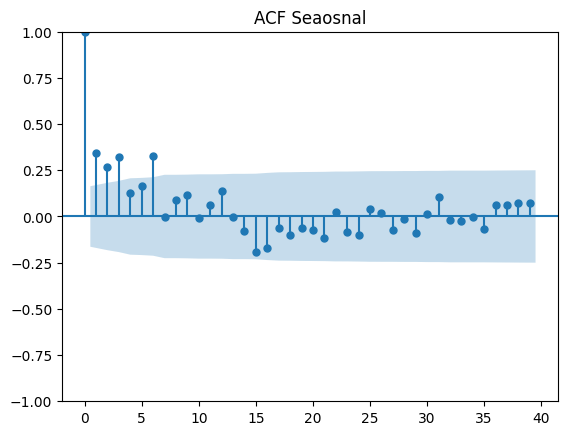

In [115]:
plt.figure(figsize=(10,8))
plot_pacf(store_df['Seaosnal_diff'], lags= 39, title='PACF Seaosnal')
plot_acf(store_df['Seaosnal_diff'], lags= 39, title='ACF Seaosnal')
plt.show()

In [116]:
adf_test = adfuller(store_df['Seaosnal_diff'])
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                  -3.545462
p-value                          0.006893
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64

In [125]:
store_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,...,IsMonthEnd,Quarter,is_Weekend,IsMonthEnd_boolean,Weekly_lag,Bi_Weekly_lag,Monthly_lag,Yearly_lag,Tri_Weekly_lag,Seaosnal_diff
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,...,False,1,False,0,50605.27,50605.27,50605.27,50605.27,21904.47,0.0
2010-02-12,1,2,44682.74,True,38.51,2.548,211.242170,8.106,A,151315,...,False,1,False,0,50605.27,50605.27,50605.27,50605.27,21904.47,0.0
2010-02-19,1,2,47928.89,False,39.93,2.514,211.289143,8.106,A,151315,...,False,1,False,0,44682.74,50605.27,50605.27,50605.27,21904.47,0.0
2010-02-26,1,2,44292.87,False,46.63,2.561,211.319643,8.106,A,151315,...,False,1,False,0,47928.89,44682.74,50605.27,50605.27,50605.27,0.0
2010-03-05,1,2,48397.98,False,46.50,2.625,211.350143,8.106,A,151315,...,False,1,False,0,44292.87,47928.89,50605.27,50605.27,44682.74,0.0


In [126]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler

feautures = ['Temperature', 'IsHoliday', 'Fuel_Price']
X = store_df[feautures]
# X['Date'] = pd.to_datetime(X['Date'])
# X.set_index('Date', inplace=True)
y = store_df['Weekly_Sales']
# y['Date'] = pd.to_datetime(y['Date'])
# y.set_index('Date', inplace=True)

numeric_features = ['Temperature','Fuel_Price']
scaler = StandardScaler()

X[numeric_features] = scaler.fit_transform(X[numeric_features])

boolean_features = ['IsHoliday']

X[boolean_features] = X[boolean_features].astype(int)

# store_df.set_index('Date', inplace=True)

split_date ='2012-05-01'

train = store_df[store_df.index < split_date]

test = store_df[store_df.index >= split_date]

X_train = X.loc[train.index]
X_test = X.loc[test.index]
y_train = y[train.index]
y_test = y[test.index]

p = 1
d = 0
q = 1

P = 4
D = 1
Q = 5
S = 52

sarimax_model = SARIMAX(y_train, exog=X_train, order=(p,d,q), seasonal_order=(P,D,Q,S))
sarimax_model_fit = sarimax_model.fit()

print(sarimax_model_fit.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73622D+01    |proj g|=  1.89324D+01


 This problem is unconstrained.



At iterate    5    f=  6.23248D+00    |proj g|=  7.98901D-01

At iterate   10    f=  5.50395D+00    |proj g|=  9.53658D+00

At iterate   15    f=  5.10250D+00    |proj g|=  1.47198D-01

At iterate   20    f=  5.09131D+00    |proj g|=  2.01457D-03

At iterate   25    f=  5.09130D+00    |proj g|=  1.19006D-02

At iterate   30    f=  5.09017D+00    |proj g|=  5.16975D-02

At iterate   35    f=  5.08994D+00    |proj g|=  3.75173D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  5.08988D+00    |proj g|=  8.21447D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     42     85      2     0     0   3.202D-04   5.090D+00
  F =   5.0898843213495253     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                            SARIMAX Results                                             
Dep. Variable:                                     Weekly_Sales   No. Observations:                  117
Model:             SARIMAX(1, 0, 1)x(4, 1, [1, 2, 3, 4, 5], 52)   Log Likelihood                -595.516
Date:                                         

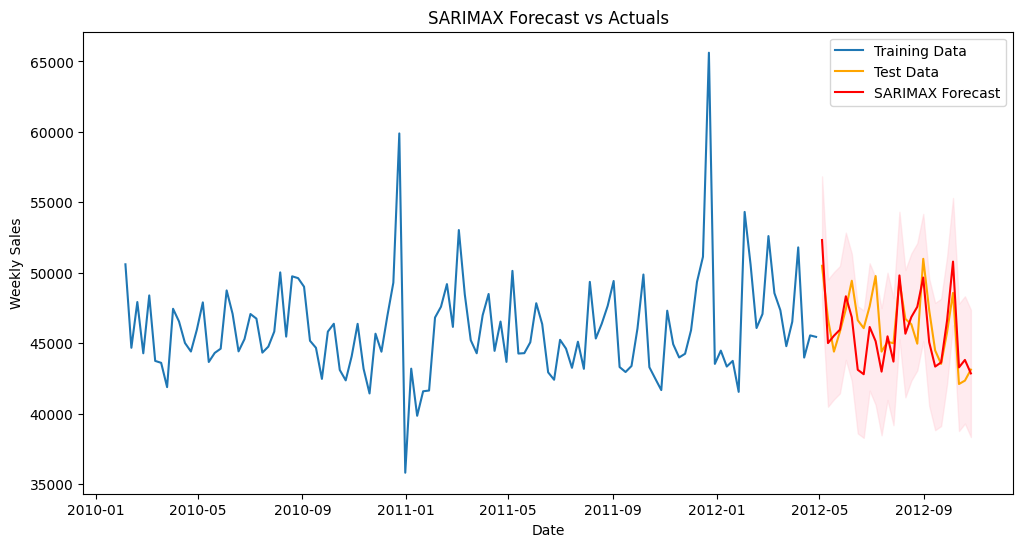

In [127]:
# Forecasting (if needed)
forecast = sarimax_model_fit.get_forecast(steps=len(X_test), exog=X_test)
# forecast = sarimax_model_fit.get_forecast(steps=len(X_test), exog=X_test)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, color='orange', label='Test Data')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='SARIMAX Forecast')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [129]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1874.4284141143942


In [57]:
df['is_Weekend']= df['DayOfWeek'].isin([5,6])
# df.head()
df['IsMonthEnd_boolean']=df['Date'].dt.is_month_end.astype(int)


In [58]:
# lag_columns = ['Weekly_lag','Bi_Weekly_lag','Monthly_lag','Yearly_lag','Tri_Weekly_lag']
# df = df.drop(columns=lag_columns)
df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,...,Year,Month,Day,DayOfWeek,WeekOfYear,IsMonthStart,IsMonthEnd,Quarter,is_Weekend,IsMonthEnd_boolean
0,2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,...,2010,2,5,4,5,False,False,1,False,0
1,2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,...,2010,2,12,4,6,False,False,1,False,0
2,2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,...,2010,2,19,4,7,False,False,1,False,0
3,2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,...,2010,2,26,4,8,False,False,1,False,0
4,2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,...,2010,3,5,4,9,False,False,1,False,0


In [69]:
df['Weekly_lag'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)
df['Bi_Weekly_lag'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(2)
df['Monthly_lag'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(4)
df['Yearly_lag'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(52)
df['Tri_Weekly_lag'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(3).ffill().bfill()

lag_columns = ['Weekly_lag','Bi_Weekly_lag','Monthly_lag','Yearly_lag','Tri_Weekly_lag']

df['Weekly_lag']= df.groupby(['Store','Dept'])['Weekly_lag'].ffill().bfill()
df['Bi_Weekly_lag'] = df.groupby(['Store','Dept'])['Bi_Weekly_lag'].ffill().bfill()
df['Monthly_lag']= df.groupby(['Store','Dept'])['Monthly_lag'].ffill().bfill()
df['Yearly_lag'] = df.groupby(['Store','Dept'])['Yearly_lag'].ffill().bfill()

# df['Quadra_Weekly_lag'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(3)

# def time_interpolation(group):
#     group = group.set_index('Date')
#     group[lag_columns] = group[lag_columns].interpolate(method='time', limit_direction='both')
#     group[lag_columns] = group[lag_columns].ffill().bfill()
#     return group.reset_index()
    

# df = df.groupby(['Store', 'Dept'], group_keys=False).apply(time_interpolation)
# print(df.isna().sum())
df.head()





,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,...,IsMonthStart,IsMonthEnd,Quarter,is_Weekend,IsMonthEnd_boolean,Weekly_lag,Bi_Weekly_lag,Monthly_lag,Yearly_lag,Tri_Weekly_lag
0,2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,...,False,False,1,False,0,24924.50,24924.50,24924.5,24924.5,24924.50
1,2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,...,False,False,1,False,0,24924.50,24924.50,24924.5,24924.5,24924.50
2,2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,...,False,False,1,False,0,46039.49,24924.50,24924.5,24924.5,24924.50
3,2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,...,False,False,1,False,0,41595.55,46039.49,24924.5,24924.5,24924.50
4,2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,...,False,False,1,False,0,19403.54,41595.55,24924.5,24924.5,46039.49


In [66]:
df

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,...,WeekOfYear,IsMonthStart,IsMonthEnd,Quarter,is_Weekend,IsMonthEnd_boolean,Weekly_lag,Bi_Weekly_lag,Monthly_lag,Yearly_lag
0,2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,...,5,False,False,1,False,0,24924.50,24924.50,24924.50,24924.50
1,2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,...,6,False,False,1,False,0,24924.50,24924.50,24924.50,24924.50
2,2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,...,7,False,False,1,False,0,46039.49,24924.50,24924.50,24924.50
3,2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,...,8,False,False,1,False,0,41595.55,46039.49,24924.50,24924.50
4,2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,...,9,False,False,1,False,0,19403.54,41595.55,24924.50,24924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2012-09-28,45,98,508.37,False,64.88,3.997,192.013558,8.684,B,...,39,False,False,3,False,0,467.30,605.96,346.04,727.05
131,2012-10-05,45,98,628.10,False,64.89,3.985,192.170412,8.667,B,...,40,False,False,4,False,0,508.37,467.30,352.44,894.98
132,2012-10-12,45,98,1061.02,False,54.47,4.000,192.327265,8.667,B,...,41,False,False,4,False,0,628.10,508.37,605.96,996.40
133,2012-10-19,45,98,760.01,False,56.47,3.969,192.330854,8.667,B,...,42,False,False,4,False,0,1061.02,628.10,467.30,1058.84


In [67]:
df['Moving_Avg_4_weeks'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=4).mean())
df['Moving_Avg_4_weeks'] = df.groupby(['Store','Dept'])['Moving_Avg_4_weeks'].ffill().bfill()
df

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,...,IsMonthStart,IsMonthEnd,Quarter,is_Weekend,IsMonthEnd_boolean,Weekly_lag,Bi_Weekly_lag,Monthly_lag,Yearly_lag,Moving_Avg_4_weeks
0,2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,...,False,False,1,False,0,24924.50,24924.50,24924.50,24924.50,32990.7700
1,2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,...,False,False,1,False,0,24924.50,24924.50,24924.50,24924.50,32990.7700
2,2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,...,False,False,1,False,0,46039.49,24924.50,24924.50,24924.50,32990.7700
3,2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,...,False,False,1,False,0,41595.55,46039.49,24924.50,24924.50,32990.7700
4,2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,...,False,False,1,False,0,19403.54,41595.55,24924.50,24924.50,32216.6200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2012-09-28,45,98,508.37,False,64.88,3.997,192.013558,8.684,B,...,False,False,3,False,0,467.30,605.96,346.04,727.05,483.5175
131,2012-10-05,45,98,628.10,False,64.89,3.985,192.170412,8.667,B,...,False,False,4,False,0,508.37,467.30,352.44,894.98,552.4325
132,2012-10-12,45,98,1061.02,False,54.47,4.000,192.327265,8.667,B,...,False,False,4,False,0,628.10,508.37,605.96,996.40,666.1975
133,2012-10-19,45,98,760.01,False,56.47,3.969,192.330854,8.667,B,...,False,False,4,False,0,1061.02,628.10,467.30,1058.84,739.3750


<Figure size 1200x600 with 0 Axes>

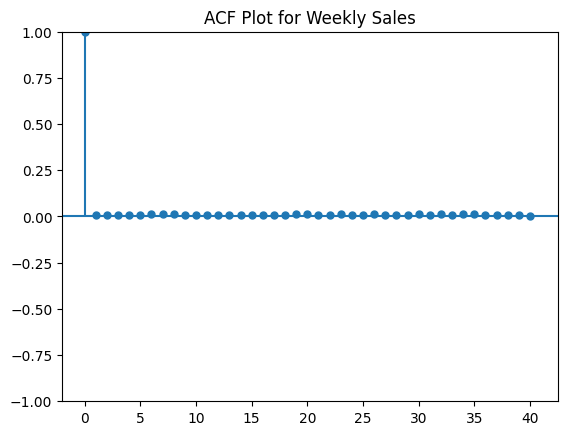

<Figure size 1200x600 with 0 Axes>

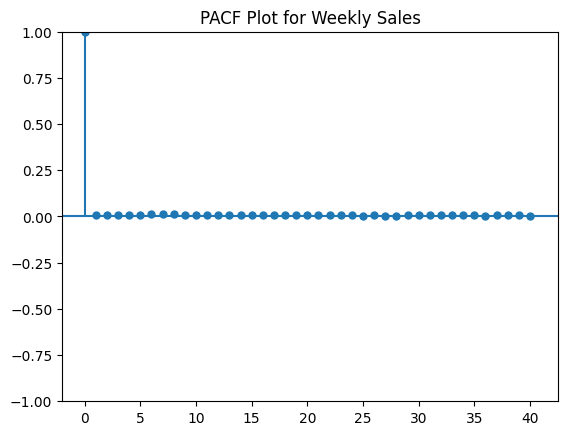

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(df['Weekly_Sales'].dropna(), lags=40)
plt.title('ACF Plot for Weekly Sales')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Weekly_Sales'].dropna(), lags=40)
plt.title('PACF Plot for Weekly Sales')
plt.show()


In [20]:
# Create rolling statistics features
df['rolling_mean_4'] = df['Weekly_Sales'].rolling(window=4).mean()
df['rolling_std_4'] = df['Weekly_Sales'].rolling(window=4).std()

# Fill NaN values created by rolling calculations
df.fillna(method='bfill', inplace=True)


/tmp/ipykernel_1145766/3380499063.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Top 10 Important Features:
Dept              0.451349
rolling_mean_4    0.210538
rolling_std_4     0.144295
Size              0.106784
Store             0.027994
CPI               0.014366
Temperature       0.010393
Type_B            0.009545
Unemployment      0.007618
Fuel_Price        0.005660
dtype: float64


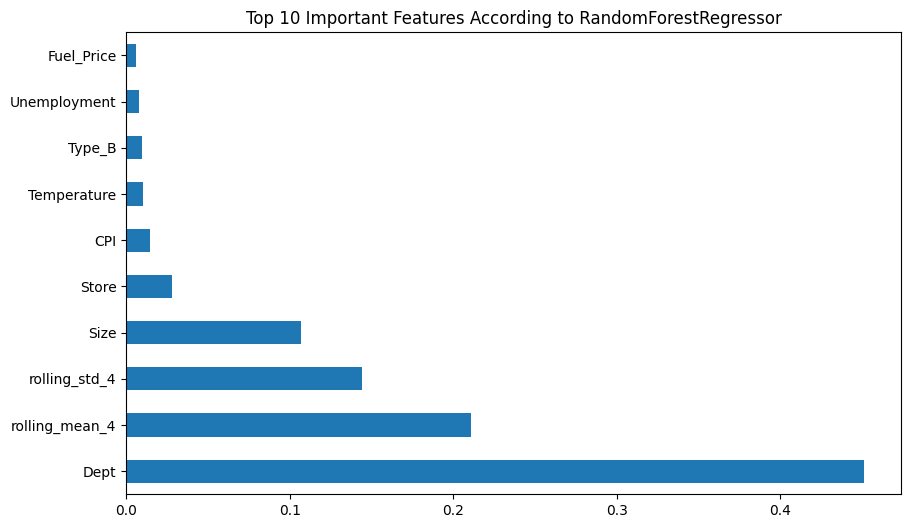

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Define target and features
X = df.drop(columns=['Weekly_Sales'])  # Dropping date and target
y = df['Weekly_Sales']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Important Features According to RandomForestRegressor')
plt.show()


Top 10 Important Features:
Dept              0.451349
rolling_mean_4    0.210538
rolling_std_4     0.144295
Size              0.106784
Store             0.027994
CPI               0.014366
Temperature       0.010393
Type_B            0.009545
Unemployment      0.007618
Fuel_Price        0.005660
MarkDown3         0.004017
MarkDown2         0.001468
MarkDown4         0.001462
MarkDown5         0.001455
MarkDown1         0.001415
dtype: float64


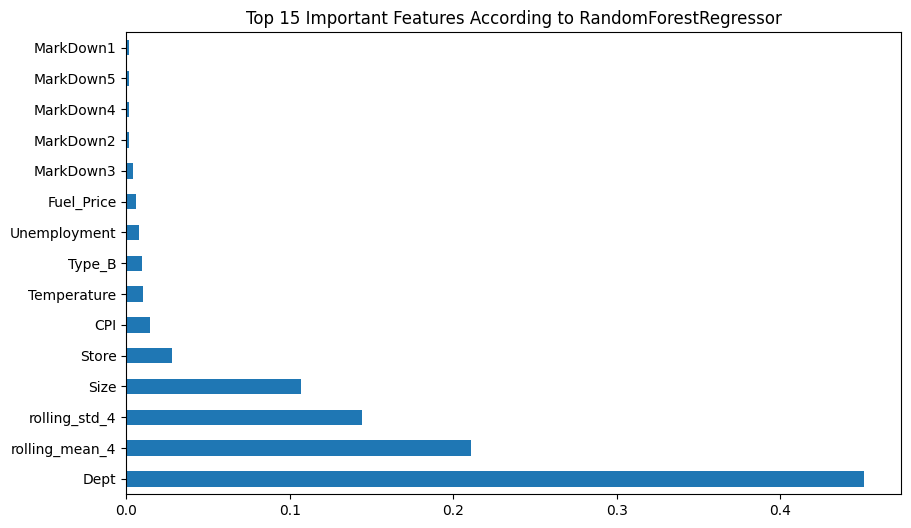

In [23]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top 10 Important Features:")
print(feature_importances.head(15))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.head(15).plot(kind='barh')
plt.title('Top 15 Important Features According to RandomForestRegressor')
plt.show()


Date
2010-02-05    False
2010-02-05    False
2010-02-05    False
2010-02-05    False
2010-02-05    False
              ...  
2012-10-26    False
2012-10-26    False
2012-10-26    False
2012-10-26    False
2012-10-26    False
Name: IsHoliday, Length: 421570, dtype: bool